In [146]:
# https://towardsdatascience.com/the-python-glob-module-47d82f4cbd2d#:~:text=glob%20(short%20for%20global)%20is,pattern%20by%20using%20wildcard%20characters.


# import pandas as pd
# import glob

# # set search path and glob for files
# # here we want to look for csv files in the input directory
# path = 'input'
# files = glob.glob(path + '/*.csv')

# # create empty list to store dataframes
# li = []

# # loop through list of files and read each one into a dataframe and append to list
# for f in files:
#     # get filename
#     stock = os.path.basename(f)
#     # read in csv
#     temp_df = pd.read_csv(f)
#     # create new column with filename
#     temp_df['ticker'] = stock
#     # data cleaning to remove the .csv
#     temp_df['ticker'] = temp_df['ticker'].replace('.csv', '', regex=True)
#     # append df to list
#     li.append(temp_df)
#     print(f'Successfully created dataframe for {stock} with shape {temp_df.shape}')

# # concatenate our list of dataframes into one!
# df = pd.concat(li, axis=0)
# print(df.shape)
# df.head()

# >> Successfully created dataframe for KRO.csv with shape (1258, 7)
# >> Successfully created dataframe for MSFT.csv with shape (1258, 7)
# >> Successfully created dataframe for TSLA.csv with shape (1258, 7)
# >> Successfully created dataframe for GHC.csv with shape (1258, 7)
# >> Successfully created dataframe for AAPL.csv with shape (1258, 7)
# >> (6290, 7)
# view rawglobbing.py hosted with ❤ by GitHub

In [147]:
from google.colab import drive
drive.mount ('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [148]:
import pandas as pd
import glob
import os 

import numpy as np 

from datetime import datetime 
import time 
import csv

import matplotlib.pyplot as plt

import seaborn as sns

In [149]:
def read_data(filename):
    start_time = time.time()
    df=pd.read_csv(filename,low_memory=False,encoding='cp1252') # added encoding because I was getting an error in reading the files 
    # https://stackoverflow.com/questions/45529507/unicodedecodeerror-utf-8-codec-cant-decode-byte-0x96-in-position-35-invalid
        # df=pd.read_csv(filename,low_memory=False)
    print(time.time() - start_time, 'seconds')
    return df

In [150]:
df = read_data('/content/gdrive/Shareddrives/DATA_606_Capstone/Data/hd2020.csv')
# df = read_data('/content/gdrive/Shareddrives/DATA_606_Capstone/Data/hd2019.csv')
df.head()

0.12003040313720703 seconds


,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG
0,100654,Alabama A & M University,AAMU,4900 Meridian Street,Normal,AL,35762,1,5,"Dr. Andrew Hugine, Jr.",President,2563725000,636001109,197216455,100200,1,www.aamu.edu/,https://www.aamu.edu/admissions-aid/index.html,https://www.aamu.edu/admissions-aid/financial-...,https://www.aamu.edu/admissions-aid/undergradu...,www.aamu.edu/admissions-aid/tuition-fees/net-p...,,,https://www.aamu.edu/administrativeoffices/VAD...,1,1,1,9,1,1,12,1,1,2,2,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,18,16,17,10,4,14,18,18,16,1,3,2,-2,-2,26620,1,290,-2,1089,Madison County,105,-86.568502,34.783368,109,1
1,100663,University of Alabama at Birmingham,,Administration Bldg Suite 1070,Birmingham,AL,35294-0110,1,5,Ray L. Watts,President,2059344011,636005396,63690705,105200,1,https://www.uab.edu/,https://www.uab.edu/students/admissions/,https://www.uab.edu/students/paying-for-college,https://ssb.it.uab.edu/pls/sctprod/zsapk003_ug...,https://uab.studentaidcalculator.com/survey.aspx,https://www.uab.edu/students/veterans,https://www.uab.edu/registrar/students,https://www.uab.edu/students/disability/,1,1,1,9,1,1,11,1,2,1,1,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,17,17,9,5,15,15,15,15,2,5,1,The University of Alabama System,101050,13820,1,142,-2,1073,Jefferson County,107,-86.799345,33.505697,95,1
2,100690,Amridge University,Southern Christian University Regions University,1200 Taylor Rd,Montgomery,AL,36117-3553,1,5,Michael C.Turner,President,3.34387E+13,237034324,126307792,2503400,1,www.amridgeuniversity.edu/,www.amridgeuniversity.edu/admissions/,www.amridgeuniversity.edu/financialaid/,https://www2.amridgeuniversity.edu/Amridge/Log...,www2.amridgeuniversity.edu:9091/,www.amridgeuniversity.edu/admissions/military/,,www.amridgeuniversity.edu/academics/,2,1,2,9,1,1,12,1,2,2,2,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,20,19,18,5,5,6,20,21,51,2,1,2,-2,-2,33860,1,388,-2,1101,Montgomery County,102,-86.174010,32.362609,126,2
3,100706,University of Alabama in Huntsville,UAH University of Alabama Huntsville,301 Sparkman Dr,Huntsville,AL,35899,1,5,Darren Dawson,President,2568246120,630520830,949687123,105500,1,www.uah.edu/,https://www.uah.edu/admissions,finaid.uah.edu/,register.uah.edu/,finaid.uah.edu/,www.uah.edu/admissions/graduate/financial-aid/...,www.uah.edu/heoa,www.uah.edu/health-and-wellness/disability-sup...,1,1,1,9,1,1,11,1,2,2,2,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,16,17,17,15,4,12,16,15,16,2,3,1,The University of Alabama System,101050,26620,1,290,-2,1089,Madison County,105,-86.640449,34.724557,99,2
4,100724,Alabama State University,,915 S Jackson Street,Montgomery,AL,36104-0271,1,5,Quinton T. Ross,President,3342294100,636001101,40672685,100500,1,www.alasu.edu/,www.alasu.edu/admissions/index.aspx,www.alasu.edu/undergraduate/expensesandfinanci...,www.alasu.edu/admissions/undergrad-admissions/...,www.alasu.edu/cost-aid/tuition-costs/net-price...,,www.alasu.edu/cost-aid/consumer-info,www.alasu.edu/academics/researchcenters/alabam...,1,1,1,9,1,1,11,1,1,2,2,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,19,13,13,10,3,14,19,18,21,2,2,2,-2,-2,33860,1,388,-2,1101,Montgomery County,107,-86.295677,32.364317,118,1


In [151]:
df.shape

(6440, 73)

In [152]:
df.columns = df.columns.str.replace(' ','')


In [153]:
df.columns

Index(['UNITID', 'INSTNM', 'IALIAS', 'ADDR', 'CITY', 'STABBR', 'ZIP', 'FIPS',
       'OBEREG', 'CHFNM', 'CHFTITLE', 'GENTELE', 'EIN', 'DUNS', 'OPEID',
       'OPEFLAG', 'WEBADDR', 'ADMINURL', 'FAIDURL', 'APPLURL', 'NPRICURL',
       'VETURL', 'ATHURL', 'DISAURL', 'SECTOR', 'ICLEVEL', 'CONTROL',
       'HLOFFER', 'UGOFFER', 'GROFFER', 'HDEGOFR1', 'DEGGRANT', 'HBCU',
       'HOSPITAL', 'MEDICAL', 'TRIBAL', 'LOCALE', 'OPENPUBL', 'ACT', 'NEWID',
       'DEATHYR', 'CLOSEDAT', 'CYACTIVE', 'POSTSEC', 'PSEFLAG', 'PSET4FLG',
       'RPTMTH', 'INSTCAT', 'C18BASIC', 'C18IPUG', 'C18IPGRD', 'C18UGPRF',
       'C18ENPRF', 'C18SZSET', 'C15BASIC', 'CCBASIC', 'CARNEGIE', 'LANDGRNT',
       'INSTSIZE', 'F1SYSTYP', 'F1SYSNAM', 'F1SYSCOD', 'CBSA', 'CBSATYPE',
       'CSA', 'NECTA', 'COUNTYCD', 'COUNTYNM', 'CNGDSTCD', 'LONGITUD',
       'LATITUDE', 'DFRCGID', 'DFRCUSCG'],
      dtype='object')

# Columns to drop right away and why:



*   'IALIAS', 'ADDR', 'CITY', 'ZIP' because they add detail to the identification of the location of the University to a detail I am not interested in including the university's alias name
*   'FIPS' Identifies the FIPS code
*   'OBEREG' Beuareau of Economic Analysis Code (identifies different regions the US territory is subdivided in 
*   'CHFNM','CHFTITLE', 'GENTELE' name and other identification information for chief operating officer at the institution
*   'EIN', 'DUNS', IRS identification number for the institution and other (non-unique) reporting number for business units within the institutions 
*   'OPEID', 'OPEFLAG', codes used by the Dept. of Education to determine HEIs participation in Financial Aid programs 
*   'WEBADDR', 'ADMINURL', 'FAIDURL', 'APPLURL', 'NPRICURL', 'VETURL', 'ATHURL', 'DISAURL', these columns indicate urls for the institution 
*   'SECTOR', 'ICLEVEL', 'CONTROL', 

NOOOOO
'HLOFFER' Classification information indicating whether the institution is public or private and 2 - 4 years
*   'GROFFER' code indicating whether the Institution offer graduate level studies
NOOOOOO

*   'HOSPITAL', 'MEDICAL', 'TRIBAL' information pertaining to whether the HEI has a hospital and a medical training program and whether it is classified as a Tribal institution located on a reservation
*   'NEWID', code referencing merged institutions 
*   'PSET4FLG', 'RPTMTH', Type of HEIs flag and reporting system 

NOOOOO 'C18IPUG', 'INSTCAT'

*   'C18BASIC', 'C18IPGRD', 'C18UGPRF', 'C18ENPRF', 'C18SZSET', 'C15BASIC', 'CCBASIC', 'CARNEGIE', Carnegie Classification codes (all except the one identifying HEis primarily focused on undergraduate programs
*   'LANDGRNT', 'INSTSIZE', Landgrant institutions and institutional size 
*   'F1SYSTYP', 'F1SYSNAM', 'F1SYSCOD', multi-campus and organization identification codes and number 
*   'CBSA', 'CBSATYPE', 'CSA', core-based and combined statistical area and type 
*   'COUNTYCD', 'COUNTYNM', 'CNGDSTCD', county name, code and congressional district
*   'NECTA', New England City and Town Area
*   'LONGITUD', 'LATITUDE' geolocation information 
*   'DFRCGID', 'DFRCUSCG' custom comparison group created by IPEDS






In [154]:
df.drop(['IALIAS', 'ADDR', 'CITY', 'ZIP', 'FIPS', 
        #  'OBEREG', 
         'CHFNM', 'CHFTITLE', 'GENTELE', 
         'EIN', 'DUNS', 'OPEID', 'OPEFLAG', 'WEBADDR', 
         'ADMINURL', 'FAIDURL', 'APPLURL', 'NPRICURL', 
         'VETURL', 'ATHURL', 'DISAURL', 
         'SECTOR', 'ICLEVEL', 
         'CONTROL', 'HOSPITAL', 'MEDICAL', 'TRIBAL', 'NEWID', 'C18IPUG',
         'PSET4FLG', 'RPTMTH', 'C18BASIC', 'C18IPGRD', 'C18UGPRF', 'INSTCAT',
         'C18ENPRF', 'C18SZSET', 'C15BASIC', 'CCBASIC', 'CARNEGIE', 'LANDGRNT', 
         'INSTSIZE', 'F1SYSTYP', 'F1SYSNAM', 'PSEFLAG','F1SYSCOD', 'CBSA', 'CBSATYPE', 'CSA', 
         'NECTA', 'COUNTYCD', 'COUNTYNM', 'CNGDSTCD', 'LONGITUD','LATITUDE', 
         'DFRCGID', 'DFRCUSCG'], axis =1, inplace = True)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6440 entries, 0 to 6439
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UNITID    6440 non-null   int64 
 1   INSTNM    6440 non-null   object
 2   STABBR    6440 non-null   object
 3   OBEREG    6440 non-null   int64 
 4   HLOFFER   6440 non-null   int64 
 5   UGOFFER   6440 non-null   int64 
 6   GROFFER   6440 non-null   int64 
 7   HDEGOFR1  6440 non-null   int64 
 8   DEGGRANT  6440 non-null   int64 
 9   HBCU      6440 non-null   int64 
 10  LOCALE    6440 non-null   int64 
 11  OPENPUBL  6440 non-null   int64 
 12  ACT       6440 non-null   object
 13  DEATHYR   6440 non-null   int64 
 14  CLOSEDAT  6440 non-null   object
 15  CYACTIVE  6440 non-null   int64 
 16  POSTSEC   6440 non-null   int64 
dtypes: int64(13), object(4)
memory usage: 855.4+ KB


Let's verify if among these institutions there are any that are closed 

In [156]:
df['DEATHYR'].unique()

array([  -2, 2020])

In [157]:
df['DEATHYR'].value_counts()

-2       6356
 2020      84
Name: DEATHYR, dtype: int64

Dropping from the Df all of the instritutions who closed in 2020 and then checking that the slicing of the df was cleared. Then dropping the corresponding columns because unneeded. 

In [158]:
df1=df.loc[lambda df:(df['DEATHYR']!=2020),:]
df=df1.copy(deep=False)

In [159]:
df['DEATHYR'].unique()

array([-2])

In [160]:
df['CLOSEDAT'].unique()

array(['-2'], dtype=object)

In [161]:
df['CLOSEDAT'].value_counts()

-2    6356
Name: CLOSEDAT, dtype: int64

In [162]:
df['CYACTIVE'].unique()
# Code 3 indicates inactive institutions. Thus we will slice these out of the df as well and then drop the relvant columns

array([1, 3])

In [163]:
df['CYACTIVE'].value_counts()

1    6278
3      78
Name: CYACTIVE, dtype: int64

In [164]:
df1=df.loc[lambda df:(df['CYACTIVE']!=3),:]
df=df1.copy(deep=False)

In [165]:
df['CYACTIVE'].value_counts()

1    6278
Name: CYACTIVE, dtype: int64

In [166]:
df.drop(['DEATHYR','CLOSEDAT', 'CYACTIVE'], axis =1, inplace = True)

In [167]:
df.tail()

,UNITID,INSTNM,STABBR,OBEREG,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,LOCALE,OPENPUBL,ACT,POSTSEC
6432,496292,Platt College-Miller-Motte College-Chattanooga 2,TN,5,1,1,2,0,2,2,12,1,N,1
6434,496326,Eagle Gate College-Boise Campus,ID,7,5,1,2,30,1,2,12,1,N,1
6436,496371,Elite Welding Academy,OH,3,2,1,2,0,2,2,22,1,N,1
6438,496414,TechSherpas 365,FL,5,1,1,2,0,2,2,21,1,N,1
6439,496423,Zorganics Institute Beauty and Wellness,WA,8,2,1,2,0,2,2,13,1,N,1


In [168]:
df['ACT'].unique()

array(['A ', 'R ', 'N '], dtype=object)

In [169]:
df['ACT']=df['ACT'].str.replace(" ","")
# To remove training and leading white space from the column ACT



In [170]:
# df.tail()

In [171]:
df['ACT'].unique()

array(['A', 'R', 'N'], dtype=object)

In [172]:
df['ACT'].value_counts()  

# Active school CYACTIVE=1 includes:
# ACT=A an open (active) institution 
# ACT=N an institution that opened in the current year 
# ACT=M an institution that closed in the current year, but will have data from the previous academic year for example Finance or Completions data for academic year 2016-17 
# ACT=R an institution that was previously not active and was restored in the current year 

# Because of code R and N I can cut these institutions out of the Df because they will not have historical data 


A    6179
N      73
R      26
Name: ACT, dtype: int64

In [173]:
df=df.loc[lambda df:(df['ACT']=='A'),:]




In [174]:
df['ACT'].unique()

array(['A'], dtype=object)

In [175]:
df['ACT'].value_counts()  

A    6179
Name: ACT, dtype: int64

In [176]:
df.drop(['ACT'], axis =1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [177]:
# Focusing in on Degree granting institutions only 
# DEGGRANT
df['DEGGRANT'].unique()

array([1, 2])

In [178]:
df['DEGGRANT'].value_counts()
# The number of institution not granting degrees is pretty high aggregately - let's look into the type of institutions these are

1    4122
2    2057
Name: DEGGRANT, dtype: int64

In [179]:
# Investigating the non degree granting institutions 

df_No_Deg_Gr =df.loc[lambda df:(df['DEGGRANT']==2),:]
df_No_Deg_Gr

,UNITID,INSTNM,STABBR,OBEREG,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,LOCALE,OPENPUBL,POSTSEC
18,101277,New Beginning College of Cosmetology,AL,5,2,1,2,0,2,2,32,1,1
62,102711,Alaska Vocational Technical Center,AK,8,2,1,2,0,2,2,43,1,1
66,103741,Empire Beauty School-Tucson,AZ,6,2,1,2,0,2,2,11,1,1
71,103954,Arizona Academy of Beauty-East,AZ,6,2,1,2,0,2,2,11,1,1
72,103963,Platt College-Arizona Automotive Institute Ari...,AZ,6,2,1,2,0,2,2,21,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6306,494719,Tonsorial Arts Barber College,TX,6,2,1,2,0,2,2,13,1,1
6307,494728,Michael's Barber & Hair Stylist Academy,TX,6,2,1,2,0,2,2,12,1,1
6311,494764,Aviation Institute of Maintenance-Charlotte,NC,5,4,1,2,0,2,2,11,1,1
6313,494834,Educational Technical College,PR,9,2,1,2,0,2,2,21,1,1


In [180]:
df_grpd = df_No_Deg_Gr.groupby(['STABBR'])
df_grpd['UNITID'].count()
# Count of non degree issuing institutions by State

STABBR
AK      1
AL     17
AR     30
AZ     36
CA    208
CO     26
CT     29
DC      4
DE     10
FL    150
GA     31
HI      4
IA     22
ID     21
IL     80
IN     36
KS     12
KY     26
LA     56
MA     42
MD     25
ME      6
MI     69
MN     12
MO     48
MS     20
MT      6
NC     31
ND      6
NE      6
NH     13
NJ     74
NM      7
NV     15
NY    126
OH    113
OK     49
OR     25
PA    112
PR     48
RI      8
SC     27
SD      6
TN     63
TX    152
UT     37
VA     33
VT      2
WA     24
WI     22
WV     30
WY      1
Name: UNITID, dtype: int64

In [181]:
# List of HEI in MD that do NOT grant degrees  
df_No_Deg_Gr.loc[lambda df_No_Deg_Gr:(df_No_Deg_Gr['STABBR']=='MD'),:]

,UNITID,INSTNM,STABBR,OBEREG,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,LOCALE,OPENPUBL,POSTSEC
1401,161800,Award Beauty School,MD,2,2,1,2,0,2,2,13,1,1
1402,161855,Baltimore Studio of Hair Design,MD,2,2,1,2,0,2,2,11,1,1
1412,162335,Delmarva Beauty Academy,MD,2,2,1,2,0,2,2,13,1,1
1413,162371,North American Trade Schools,MD,2,2,1,2,0,2,2,21,1,1
1422,162830,Aveda Institute-Maryland,MD,2,2,1,2,0,2,2,22,1,1
1432,163347,Fortis Institute-Towson,MD,2,2,1,2,0,2,2,13,1,1
1433,163408,Montgomery Beauty School,MD,2,2,1,2,0,2,2,21,1,1
1438,163541,Hair Academy,MD,2,2,1,2,0,2,2,21,1,1
1441,163754,Robert Paul Academy of Cosmetology Arts & Scie...,MD,2,2,1,2,0,2,2,21,1,1
1442,163815,Maryland Beauty Academy of Essex,MD,2,2,1,2,0,2,2,21,1,1


In [182]:
# Given the type of schools not granting degrees are NOT the focus of my research I am going to drop these from the DF 
df1 = df.loc[lambda df:(df['DEGGRANT']==1),:]
df1.drop(['DEGGRANT'], axis =1, inplace = True)
df=df1.copy(deep=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [183]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4122 entries, 0 to 6316
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UNITID    4122 non-null   int64 
 1   INSTNM    4122 non-null   object
 2   STABBR    4122 non-null   object
 3   OBEREG    4122 non-null   int64 
 4   HLOFFER   4122 non-null   int64 
 5   UGOFFER   4122 non-null   int64 
 6   GROFFER   4122 non-null   int64 
 7   HDEGOFR1  4122 non-null   int64 
 8   HBCU      4122 non-null   int64 
 9   LOCALE    4122 non-null   int64 
 10  OPENPUBL  4122 non-null   int64 
 11  POSTSEC   4122 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 418.6+ KB


In [39]:
df['OPENPUBL'].value_counts()  
# Two institutions are not open to the public in this sub group 

1    4120
0       2
Name: OPENPUBL, dtype: int64

In [40]:
# The institutions not open to the public are Military Academies - 
# Given the special nature of these institutions we could consider dropping them from our list 
# BUT for now we are keeping them into the fold
df.loc[lambda df:(df['OPENPUBL']==0),:]

,UNITID,INSTNM,STABBR,OBEREG,SECTOR,ICLEVEL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,HBCU,LOCALE,OPENPUBL,POSTSEC
388,119678,Naval Postgraduate School,CA,0,1,1,9,2,1,12,2,22,0,1
2530,200697,Air Force Institute of Technology-Graduate Sch...,OH,0,1,1,9,2,1,12,2,21,0,1


In [41]:
# Code indicating whether institutions offer undergraduate degrees or certificates  
df['UGOFFER'].unique()

array([1, 2])

In [42]:
df['UGOFFER'].value_counts()
# There are 287 Institutions that offer graduate level degrees or certificates 

1    3835
2     287
Name: UGOFFER, dtype: int64

In [43]:
# Taking a peak at the institutions who do not offer undergraduate degrees based on the code above 
# We can see that they are mosty specialization schools or special schools (religious isntitutions, nursing schools, for example) 
# We can consider these school post-undergraduate 

df_UGOFFer_2 =df.loc[lambda df:(df['UGOFFER']==2),:]
df_UGOFFer_2

,UNITID,INSTNM,STABBR,OBEREG,SECTOR,ICLEVEL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,HBCU,LOCALE,OPENPUBL,POSTSEC
86,104665,The School of Architecture,AZ,6,2,1,7,2,1,20,2,21,1,1
174,108269,Academy of Chinese Culture and Health Sciences,CA,8,2,1,9,2,1,12,2,11,1,1
179,108861,Berkeley School of Theology,CA,8,2,1,9,2,1,14,2,12,1,1
180,108870,American Film Institute Conservatory,CA,8,2,1,7,2,1,20,2,11,1,1
202,110398,University of California-Hastings College of Law,CA,8,1,1,9,2,1,13,2,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6221,492704,Ponce Health Sciences University-Centro Univer...,PR,9,3,1,9,2,1,13,2,11,1,1
6257,493673,Puerto Rico School of Nurse Anesthetists,PR,9,3,1,7,2,1,20,2,11,1,1
6276,493947,Idaho College of Osteopathic Medicine,ID,7,3,1,9,2,1,13,2,21,1,1
6279,494010,Ponce Health Sciences University-St Louis,MO,4,3,1,9,2,1,13,2,11,1,1


In [44]:
# However ALL of these institutions offer Graduate level degrees 
# (or at least Post Undergraduate level degrees) 
df_UGOFFer_2['GROFFER'].value_counts()

1    287
Name: GROFFER, dtype: int64

In [45]:
# df_UGOFFer_2['HDEGOFR1'].value_counts()

In [46]:
# df_UGOFFer_2['SECTOR'].value_counts()

In [47]:
# df_UGOFFer_2['ICLEVEL'].value_counts()

In [48]:
# We will drop these HEI who do NOT offer undergraduate level degrees as they are beyond the scope of our analysis 
df3 = df.loc[lambda df:(df['UGOFFER']==1),:]

df3.drop(['UGOFFER'], axis =1, inplace = True)
df=df3.copy(deep=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [49]:
# df_UGOFFer_2.iloc[:20]

In [50]:
# df_UGOFFer_2.iloc[21:40]

In [51]:
# df_UGOFFer_2.iloc[41:60]

In [52]:
df_UGOFFer_2.iloc[61:80]
# only one institution in MD  does not offer undergraduate degree while it is a degree graniting institution 

,UNITID,INSTNM,STABBR,OBEREG,SECTOR,ICLEVEL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,HBCU,LOCALE,OPENPUBL,POSTSEC
1027,148885,University of Saint Mary of the Lake,IL,3,2,1,9,2,1,14,2,21,1,1
1030,148982,Spertus College,IL,3,2,1,9,2,1,12,2,11,1,1
1058,150215,Christian Theological Seminary,IN,3,2,1,9,2,1,11,2,11,1,1
1060,150288,Concordia Theological Seminary,IN,3,2,1,9,2,1,12,2,11,1,1
1097,151865,Anabaptist Mennonite Biblical Seminary,IN,3,2,1,7,2,1,20,2,13,1,1
1109,152451,Saint Meinrad School of Theology,IN,3,2,1,8,2,1,20,2,43,1,1
1170,154156,Des Moines University-Osteopathic Medical Center,IA,4,2,1,9,2,1,11,2,12,1,1
1187,154536,Wartburg Theological Seminary,IA,4,2,1,7,2,1,20,2,13,1,1
1252,156222,Asbury Theological Seminary,KY,5,2,1,9,2,1,12,2,31,1,1
1269,156727,Frontier Nursing University,KY,5,2,1,9,2,1,13,2,41,1,1


In [53]:
# df_UGOFFer_2.iloc[81:100]

In [54]:
# Code indicating highest degree offered 
df['HDEGOFR1'].value_counts()

40    1310
20     796
30     709
11     466
12     280
13     228
14      46
Name: HDEGOFR1, dtype: int64

In [55]:
df['GROFFER'].value_counts()

2    2009
1    1826
Name: GROFFER, dtype: int64

In [56]:
df['POSTSEC'].value_counts()
# Only 1 institutions Nationally does/do not have as primary purpose to provide a Post-Secondary Degree

1    3834
2       1
Name: POSTSEC, dtype: int64

In [57]:
df.loc[lambda df:(df['POSTSEC']==2),:]
# I am not dropping these entities at this time 
# BUT I have to keep in mind the different nature of these institutions 

# None are located in Maryland 

,UNITID,INSTNM,STABBR,OBEREG,SECTOR,ICLEVEL,HLOFFER,GROFFER,HDEGOFR1,HBCU,LOCALE,OPENPUBL,POSTSEC
3037,216551,Valley Forge Military College,PA,2,5,2,3,2,40,2,21,1,2


In [58]:
# # Code representing type of degree graniting institution
# df['INSTCAT'].value_counts()  

In [59]:
# df['INSTCAT'].unique()

In [60]:
# df['C18IPUG'].unique()

In [61]:
# # Code  used by Carnegie Classification on Undergraduate granting institutions 
# df['C18IPUG'].value_counts()  

In [62]:
# OBEREG = indicates the Bureau of Economic ANalysis Regions the US is divided into 
# MD is in region 2

# 0 - US Service schools

# 1 - New England CT ME MA NH RI VT
# 2 - Mid East DE DC MD NJ NY PA

# 3 - Great Lakes IL IN MI OH WI
# 4 - Plains IA KS MN MO NE ND SD

# 5 - Southeast AL AR FL GA KY LA MS NC SC TN VA WV

# 6 - Southwest AZ NM OK TX
# 7 - Rocky Mountains CO ID MT UT WY
# 8 - Far West AK CA HI NV OR WA

# 9 - Outlying areas AS FM GU MH MP PR PW VI  - (Not in the Continental USA) 

# -3 - Not available

df['OBEREG'].value_counts()

5    960
2    613
8    555
3    518
6    374
4    361
1    222
7    133
9     94
0      5
Name: OBEREG, dtype: int64

In [63]:
# NOTE that Military Schools are identified with code 0 separately from the rest - 
# There are 7 in this df at the moment - 
# Only one located in MD  

df.loc[lambda df:(df['OBEREG']==0),:]

,UNITID,INSTNM,STABBR,OBEREG,SECTOR,ICLEVEL,HLOFFER,GROFFER,HDEGOFR1,HBCU,LOCALE,OPENPUBL,POSTSEC
572,128328,United States Air Force Academy,CO,0,1,1,5,2,30,2,31,1,1
620,130624,United States Coast Guard Academy,CT,0,1,1,5,2,30,2,13,1,1
1449,164155,United States Naval Academy,MD,0,1,1,5,2,30,2,21,1,1
2365,197027,United States Merchant Marine Academy,NY,0,1,1,7,1,20,2,21,1,1
2366,197036,United States Military Academy,NY,0,1,1,5,2,30,2,31,1,1


In [64]:
# Checking the number of institutions by State - to take  alook at the data 

df['STABBR'].value_counts()

CA    388
NY    276
TX    231
PA    179
FL    168
OH    159
IL    144
NC    131
GA    107
VA    103
MA    100
MO     86
NJ     85
MI     85
PR     85
MN     80
TN     80
WA     69
IN     66
WI     64
SC     64
AL     63
KS     62
CO     60
AZ     60
KY     57
LA     57
AR     55
IA     54
MD     54
OR     50
OK     47
WV     40
CT     40
NE     37
NM     36
MS     35
ME     30
UT     26
MT     24
NH     23
SD     22
NV     22
ND     20
HI     17
VT     17
ID     15
RI     13
DC     13
AK      9
WY      9
DE      9
GU      3
AS      1
MP      1
FM      1
PW      1
VI      1
MH      1
Name: STABBR, dtype: int64

In [65]:
# The data currently includes institutions located in US Territories such as Guam etc. 
df['STABBR'].nunique()

59

In [66]:
df['STABBR'].unique()

array(['AL', 'AK', 'WA', 'AZ', 'NM', 'AR', 'CA', 'MN', 'CO', 'CT', 'NY',
       'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'MO',
       'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MS', 'MT', 'NE', 'NV', 'NH',
       'NJ', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VT', 'VA', 'WV', 'WI', 'WY', 'AS', 'GU', 'MP', 'PR',
       'FM', 'PW', 'VI', 'MH'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


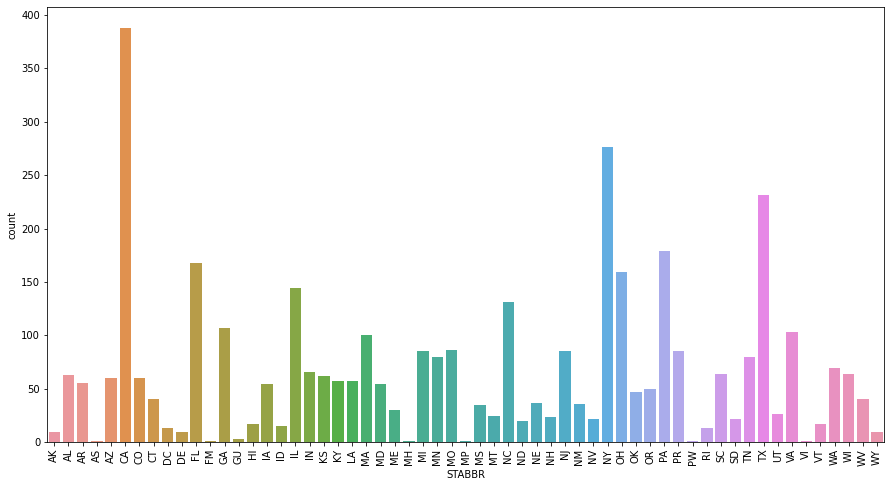

In [67]:
# Schools distribution by State (States are in Alphabetical order - including territories) 
fig_dims = (15, 8)
fig = plt.subplots(figsize=fig_dims)
sns.countplot(df['STABBR'].sort_values(ascending=True)) 
plt.xticks(rotation=90)
plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


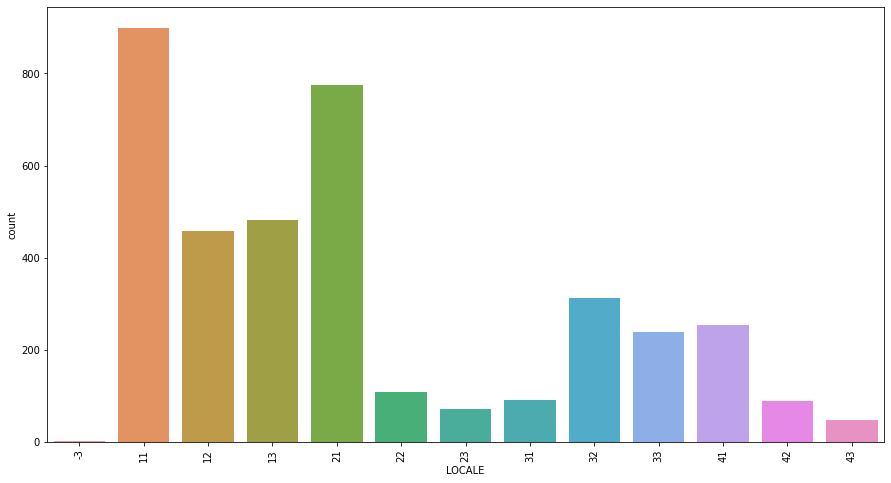

In [68]:
# Schools distribution by Local Characteristics (urban vs rural etc.) 
fig_dims = (15, 8)
fig = plt.subplots(figsize=fig_dims)
sns.countplot(df['LOCALE'].sort_values(ascending=True)) 
plt.xticks(rotation=90)
plt.show()

# # Local Characteristics

# -3 = Not avpplicable (American Samoa, the Commonwealth of the Northern Mariana Islands, Guam, and the Virgin Islands,  
#      were not assigned a locale code because the geographic and 
#      governmental structures of these entities do not fit the definitional scheme used to derive the code.)

# 11 = City: Large: Territory inside an urbanized area and inside a principal city with population of 250,000 or more. 

# 12 = City: Midsize: Territory inside an urbanized area and inside a principal city with population less than 250,000 and greater than or equal to 100,000.

# 13 = City: Small: Territory inside an urbanized area and inside a principal city with population less than 100,000.

# 21 = Suburb: Large: Territory outside a principal city and inside an urbanized area with population of 250,000 or more.

# 22 = Suburb: Midsize: Territory outside a principal city and inside an urbanized area with population less than 250,000 and greater than or equal to 100,000.

# 23 = Suburb: Small: Territory outside a principal city and inside an urbanized area with population less than 100,000.

# 31 = Town: Fringe: Territory inside an urban cluster that is less than or equal to 10 miles from an urbanized area.

# 32 = Town: Distant: Territory inside an urban cluster that is more than 10 miles and less than or equal to 35 miles from an urbanized area.

# 33 = Town: Remote: Territory inside an urban cluster that is more than 35 miles of an urbanized area.

# 41 - Rural: Fringe: Census-defined rural territory that is less than or equal to 5 miles from an urbanized area, as well as rural territory that is less than or equal to 2.5 miles from an urban cluster. 

# 42 = Rural: Distant: Census-defined rural territory that is more than 5 miles but less than or equal to 25 miles from an urbanized area, as well as rural territory that is more than 2.5 miles but less than or equal to 10 miles from an urban cluster. 

# 43 = Rural: Remote: Census-defined rural territory that is more than 25 miles from an urbanized area and is also more than 10 miles from an urban cluster.


In [69]:
# # Degree granting institutions

# df['DEGGRANT'].value_counts()

In [70]:
# Decided not to do the whole read at once to get better acquainted with the data on a smaller data set first 

# path = '/content/gdrive/Shareddrives/DATA_606_Capstone/Data'
# files = glob.glob(path + '/hd*.csv')
# li = []
# for f in files:
#     # get filename
#     stack = os.path.basename(f)
#     # read in csv
#     temp_df = pd.read_csv(f,low_memory=False,encoding='cp1252') # added encoding because I was getting an error in reading the files )
#     # create new column with filename
#     temp_df['file_name'] = stack
#     # data cleaning to remove the .csv
#     temp_df['file_name'] = temp_df['file_name'].replace('.csv', '', regex=True)
#     # append df to list
#     li.append(temp_df)
#     print(f'Successfully created dataframe for {stack} with shape {temp_df.shape}')

# # concatenate our list of dataframes into one!
# df_hd = pd.concat(li, axis=0)
# print(df_hd.shape)
# df_hd.head()

# # https://towardsdatascience.com/the-python-glob-module-47d82f4cbd2d#:~:text=glob%20(short%20for%20global)%20is,pattern%20by%20using%20wildcard%20characters.